<a href="https://colab.research.google.com/github/harshal-kaushik/ML-Algorithms/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,n_features=10,centers=3)

In [4]:
X.shape

(1000, 10)

In [5]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca =  pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [9]:
pca.explained_variance_

array([5.40426223, 3.5678106 ])

Text(0, 0.5, 'Second Principal Component')

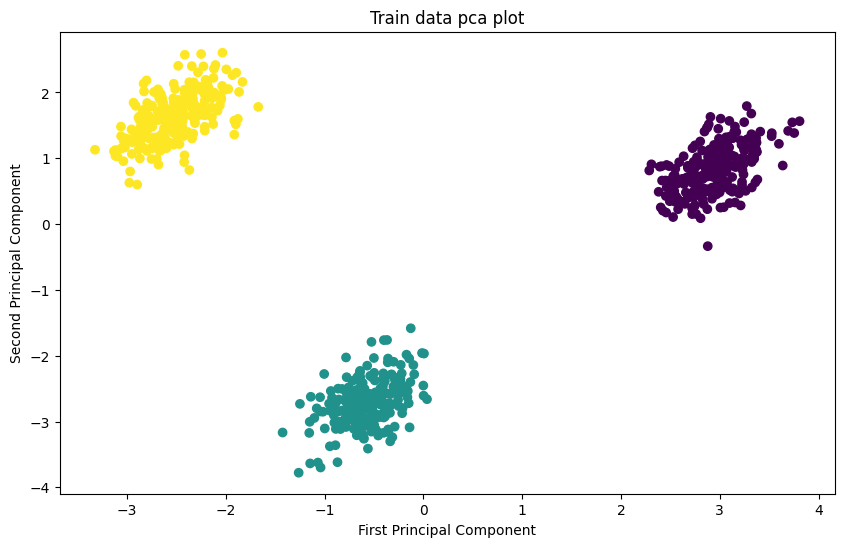

In [10]:
# pca visuilization
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)
plt.title("Train data pca plot")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [11]:
# KMeans
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X_train_pca)
  wcss.append(kmeans.inertia_)

In [12]:
wcss

[6271.478904703013,
 2724.6202465766623,
 150.66861066555074,
 130.10392026452203,
 101.63340127794767,
 74.32031216354784,
 69.09366616189621,
 63.40579863098971,
 58.30995816588027,
 56.69917041076737]

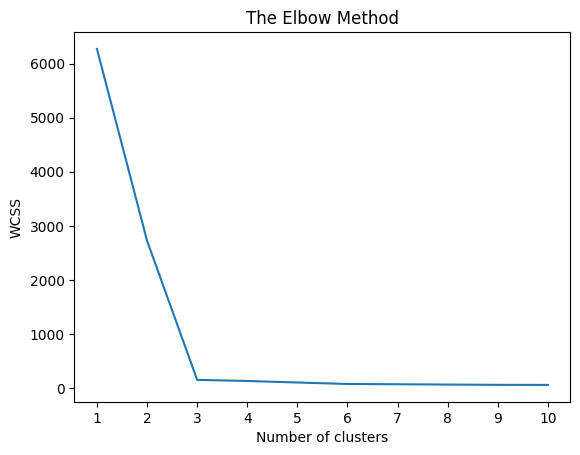

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# k=3 no of clusters formed
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans_train = kmeans.fit_predict(X_train_pca)
y_kmeans_test = kmeans.predict(X_test_pca)

In [18]:
# silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coeff =[]
for k in range(2,10):
  kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X_train_pca)
  score = silhouette_score(X_train_pca,kmeans.labels_)
  silhouette_coeff.append(score)

In [19]:
silhouette_coeff

[np.float64(0.6308434255878574),
 np.float64(0.8815213351762684),
 np.float64(0.7240688810206115),
 np.float64(0.5743224698764698),
 np.float64(0.42051062048991844),
 np.float64(0.40034896889275945),
 np.float64(0.36102367356625403),
 np.float64(0.3701713501452672)]

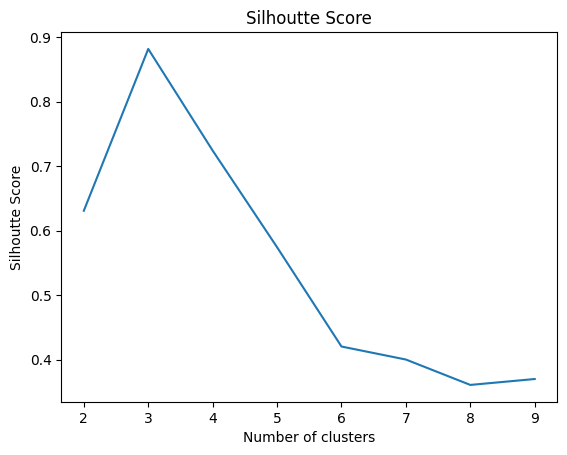

In [20]:
plt.plot(range(2,10),silhouette_coeff)
plt.xticks(range(2,10))
plt.title('Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()